In [1]:
%pip install ucimlrepo
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


# Clase 5: Tecnicas de evaluacion de modelos, para evitar overfitting y para balancear bias con varianza

Dataset Adultos

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

X.dropna()
y.dropna()

x = pd.DataFrame()
x['age'] = X['age']
x['hours-per-week'] = X['hours-per-week']

# Todo este codigo es simplemente para tener una columna que sea Income_<=50K
# que sea true si el income es <= a 50k y falso caso contrario
y.loc[y['income'] == '<=50K.'] = '<50K'
y.loc[y['income'] == '>50K.'] = '>50K'
y.loc[y['income'] == '<50K'] = '<=50K'

y_bin = pd.get_dummies(y)
y_after_dummies = y_bin['income_<=50K']
y = pd.DataFrame()
y['income'] = y_after_dummies
y["income"]

C:\Users\gonza\AppData\Local\Temp\ipykernel_4596\2566573862.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == '<=50K.'] = '<50K'
C:\Users\gonza\AppData\Local\Temp\ipykernel_4596\2566573862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == '>50K.'] = '>50K'
C:\Users\gonza\AppData\Local\Temp\ipykernel_4596\2566573862.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == 

0         True
1         True
2         True
3         True
4         True
         ...  
48837     True
48838     True
48839     True
48840     True
48841    False
Name: income, Length: 48842, dtype: bool

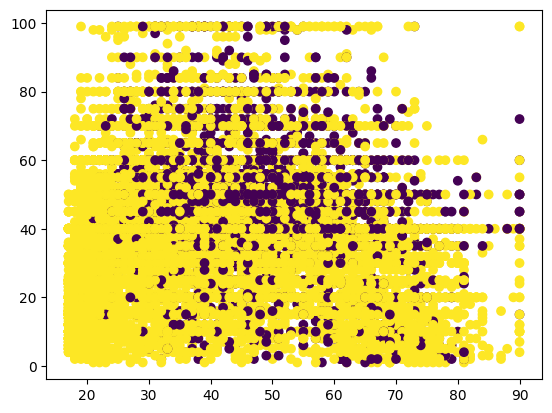

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x['age'], x['hours-per-week'], cmap='viridis', c=y['income'])
plt.show()

Validacion cruzada y calculos de precision del modelo

K-Fold Cross Validation

In [4]:
# Para regresión logística
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()
cv_lr = cross_val_score(model, x, y.squeeze())
score = np.mean(cv_lr)
score

0.754412200286906

In [5]:
# Para k neighbors
from sklearn import neighbors

model = neighbors.KNeighborsClassifier(5, weights='uniform')
cv_knn = cross_val_score(model, x, y.squeeze())
score = np.mean(cv_knn)
score

0.7276114087174584

Leave One Out Cross Validation

In [ ]:
# Regresión logística
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
loocv_lr = cross_val_score(model, x, y.squeeze(), cv=LeaveOneOut())
score = np.mean(loocv_lr)
score
# tarda mucho xD

In [ ]:
# KNN
cv_knn = cross_val_score(neighbors.KNeighborsClassifier(5, weights='uniform'), x, y.squeeze(), cv=LeaveOneOut())
score = np.mean(loocv_knn)
score
# tarda mucho xD

Bias-Variance Trade Off

In [6]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

y.loc[y['income'] == '<=50K.'] = '<50K'
y.loc[y['income'] == '>50K.'] = '>50K'
y.loc[y['income'] == '<50K'] = '<=50K'
y_bin = pd.get_dummies(y)
y_after_dummies = y_bin['income_<=50K']

y = pd.DataFrame()
y['income'] = y_after_dummies

df = pd.DataFrame()
df = X
df['income'] = y

df = df.replace('?', np.nan).dropna()
df = pd.get_dummies(df)

C:\Users\gonza\AppData\Local\Temp\ipykernel_4596\1631337057.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == '<=50K.'] = '<50K'
C:\Users\gonza\AppData\Local\Temp\ipykernel_4596\1631337057.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == '>50K.'] = '>50K'
C:\Users\gonza\AppData\Local\Temp\ipykernel_4596\1631337057.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y['income'] == 

In [ ]:
from sklearn.model_selection import train_test_split
y = df['income']
X = df.drop(columns=['income'])

train_data = pd.DataFrame()
train_error = []
test_error = []
for i in X.columns:
  train_data[i] = X[i]
  X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=4)
  model = LogisticRegression(max_iter=2000, C=100).fit(X_train, y_train)
  train_error.append(1 - model.score(X_train, y_train))
  test_error.append(1 - model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(train_error)), train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(test_error)), test_error, label='Testing Error')
plt.xlabel('Number of Features')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off in Logistic Regression')
plt.legend()

plt.show()
# tarda mucho xD

# Clase 6: Matriz de confusion y Curva ROC-AUC

In [7]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,0,0,40,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48837,39,215419,13,0,0,36,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,13,0,0,50,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,13,5455,0,40,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [8]:
y = df['income']
X = df.drop(columns=['income'])

Modelo de Regresion Logística para clasificar predicciones

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = LogisticRegression(max_iter=2000).fit(X_train, y_train)


c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.14176815, 0.85823185],
       [0.90331745, 0.09668255],
       [0.03219261, 0.96780739],
       ...,
       [0.33202072, 0.66797928],
       [0.26819541, 0.73180459],
       [0.67539015, 0.32460985]])

Accuracy / Precision del modelo para un umbral neutro

In [11]:
model.score(X_test, y_test)

0.8423438363736871

Creacion de la matriz de confusion

Creamos una funcion que para un umbral dado clasifique todas las predicciones en funcion de la misma.

In [12]:
def classify(model, x, threshold=0.5):
  y_pred_proba = model.predict_proba(x)
  y_pred = []
  for pred in y_pred_proba:
    if pred[1] > threshold:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

la variable y_pred tendrá clasificado como 1 todas predicciones cuya probabilidad de ser verdadera sea > 0.6

In [13]:
y_pred = classify(model, X_test, 0.6)

Definimos la funcion que retornara la matriz de confusion correspondiente al caso

In [14]:
def cm(prediction, actual):
  tn = fn = fp = tp = 0
  i = 0
  for pred, true in zip(prediction, actual):
    if pred == 1 and true == 1:
      tp += 1
    elif pred == 1 and true == 0:
      fp += 1
    elif pred == 0 and true == 1:
      fn += 1
    else:
      tn += 1
  return tn, fn, fp, tp

In [15]:
tn, fn, fp, tp = cm(y_pred, y_test)

In [16]:
print("Confusion Matrix:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")

Confusion Matrix:
              Actual 0       Actual 1
Predicted 1     737            6064
Predicted 0     1506             738


Metricas para extraer a partir de la matriz de confusion

In [17]:
#Redefinimos accuracy
def accuracy(tp, tn, fp, fn):
  '''
  cantidad de aciertos sobre el total
  '''
  return (tp + tn) / (tp + tn + fp + fn)
#Sensibilidad o Recall. Tambien conocido como TPR: True Positive Rate
def tpr(tp, tn, fp, fn):
  '''
  Valores correctamente predichos como positivos
  respecto al universo de reales positivos
  '''
  return tp / (tp + fn)
#Precision: Valores reales positivos sobre
def precision(tp, tn, fp, fn):
  '''
  Valores correctamente predichos como positivos respecto a
  los predichos como positivos
  '''
  return tp / (tp + fp)
#False Positive Rate
def fpr(tp, tn, fp, fn):
  '''
  Valores mal predichos como positivos
  respecto al universo del total de negativos
  '''
  return fp / (fp + tn)

In [18]:
print(f"Accuracy:   {accuracy(tp, tn, fp, fn):.2f}")
print(f"TPR/Recall:   {tpr(tp, tn, fp, fn):.2f}")
print(f"Precision:   {precision(tp, tn, fp, fn):.2f}")
print(f"FPR:   {fpr(tp, tn, fp, fn):.2f}")

Accuracy:   0.84
TPR/Recall:   0.89
Precision:   0.89
FPR:   0.33


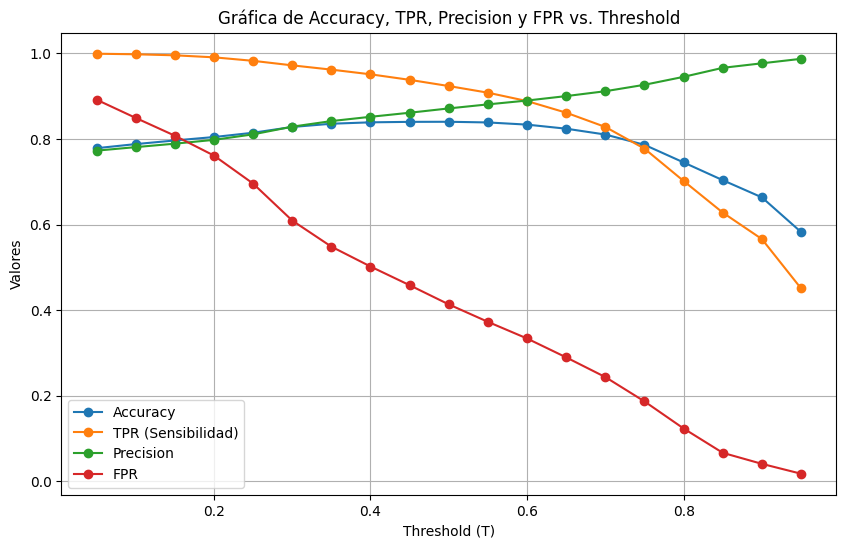

In [19]:
# Grafico las 4 variables con respecto al treshold
datos = pd.DataFrame()
T = np.arange(0.05, 1, 0.05)
for i, t in enumerate(T):
  y_pred = classify(model, X_train, t)
  tn, fn, fp, tp = cm(y_pred, y_train)
  row = pd.DataFrame({
      'acc': [accuracy(tp, tn, fp, fn)],
      'tpr': [tpr(tp, tn, fp, fn)],
      'precision': [precision(tp, tn, fp, fn)],
      'fpr': [fpr(tp, tn, fp, fn)]
  })
  datos = pd.concat([datos, row], ignore_index=True)

plt.figure(figsize=(10, 6))

plt.plot(T, datos['acc'], label='Accuracy', marker='o')
plt.plot(T, datos['tpr'], label='TPR (Sensibilidad)', marker='o')
plt.plot(T, datos['precision'], label='Precision', marker='o')
plt.plot(T, datos['fpr'], label='FPR', marker='o')

plt.xlabel('Threshold (T)')
plt.ylabel('Valores')
plt.title('Gráfica de Accuracy, TPR, Precision y FPR vs. Threshold')
plt.legend()

plt.grid(True)
plt.show()

Ejercicio de matriz de confusion

Supongamos que este modelo tiene la finalidad de predecir aquellos ciudadanos con ingreso < 50K ya que consideramos que son la poblacion que debe recibir un subsidio economico extraordinario de 1000usd.

Asignarlo correctamente representa un costo de 1000usd al Estado, asignarlo incorrectamente tiene un costo de 2000usd debido al descubrimiento de reclamos fraudulentos ya que ahora incurre en un proceso de investigación y recuperación. no asignarlo a alguien que no lo necesita es costo 0 pero no asignarlo a alguien que lo necesita representa un costo estimado de 3500usd debido a los costos extras q incurrira el Estado al no haber proporcionado ayuda de forma temprana y preventiva.

In [20]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

X.dropna()
y.dropna()

y_bin = pd.get_dummies(y)

Y = y_bin["income_<=50K"]
X = pd.get_dummies(X)
X = X.drop(columns=['workclass_Without-pay', 'education_Some-college', 'marital-status_Never-married', 'occupation_Other-service',
              'relationship_Unmarried', 'race_Other', 'sex_Female', 'native-country_Yugoslavia'])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
model = LogisticRegression().fit(X_train, y_train)

model.score(X_test, y_test)

c:\Users\gonza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5945337291432081

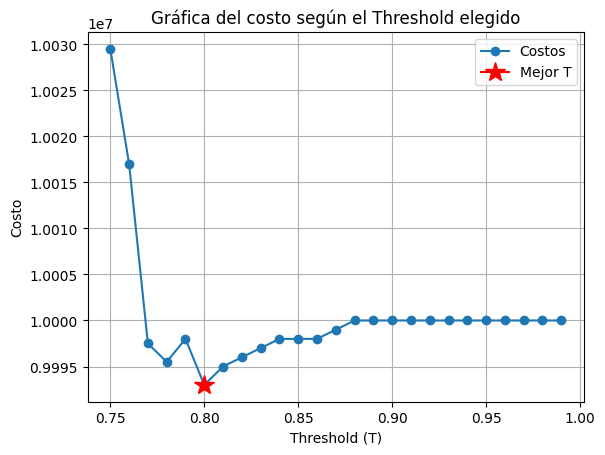

In [21]:


def classify(x, t):
    y_pred_probas = model.predict_proba(x)
    y_pred = []
    for y_pred_proba in y_pred_probas:
        y_pred.append(y_pred_proba[1] > t)
    return y_pred

def matriz(X_test, y_actual, t):
    resultados = classify(X_test, t)
    tp = 0
    fn = 0
    tn = 0
    fp = 0
    for resultado, actual in zip(resultados, y_actual):
        if resultado == True and actual == True:
            tp += 1
        elif resultado == True and actual == False:
            fn += 1
        elif resultado == False and actual == False:
            tn += 1
        elif resultado == False and actual == True:
            fp += 1
    return tp, fn, tn, fp

def costo(tp, fn, tn, fp):
    costo_tp = 1000
    costo_fn = 3500
    costo_tn = 0
    costo_fp = 2000
    return costo_tp * tp + costo_fn * fn + costo_tn * tn + costo_fp * fp

T = np.arange(0.75, 1, 0.01)
costos = []
for t in T:
    tp, fn, tn, fp = matriz(X_test, y_test, t)
    costo_total = costo(tp, fn, tn, fp)
    costos.append(costo_total)

mejor_t = T[costos.index(min(costos))]

plt.plot(T, costos, label='Costos', marker='o')
plt.xlabel('Threshold (T)')
plt.ylabel('Costo')
plt.title('Gráfica del costo según el Threshold elegido')
plt.legend()
plt.grid(True)

plt.plot(mejor_t, min(costos), marker='*', markersize=15, color='red', label='Mejor T')

plt.legend()
plt.show()